Лабораторна робота №2

1. Імпортуємо необхідні бібліотеки.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import time
np.random.seed(42)
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

2. Зчитуємо датасет про результати медичних тестів.

In [4]:
df = pd.read_csv('Data/healthcare_dataset.csv')
df.shape, df.head()

((55500, 15),
             Name  Age  Gender Blood Type Medical Condition Date of Admission  \
 0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
 1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
 2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
 3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
 4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   
 
              Doctor                    Hospital Insurance Provider  \
 0     Matthew Smith             Sons and Miller         Blue Cross   
 1   Samantha Davies                     Kim Inc           Medicare   
 2  Tiffany Mitchell                    Cook PLC              Aetna   
 3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
 4    Kathleen Hanna                 White-White              Aetna   
 
    Billing Amount  Room Number Admission Type Discharge Date   Medica

3.	Створюємо бінарну ціль та відкидуємо непереконливі результати.

In [5]:
df = df.copy()

df = df[df['Test Results'] != 'Inconclusive'].reset_index(drop=True)
df['Test_Result_Normal'] = (df['Test Results'] == 'Normal').astype(int)

4. Видаляємо неінформативні колонки, що вказані у методичці.

In [6]:
to_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Room Number', 'Discharge Date', 'Test Results']
for c in to_drop:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test_Result_Normal
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,1
1,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,1
2,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,0
3,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,0
4,36,Male,A+,Asthma,UnitedHealthcare,48145.110951,Urgent,Ibuprofen,1


5. Перевіряємо датасет на пропуски. Їх немає.

In [7]:
df.isna().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Medication            0
Test_Result_Normal    0
dtype: int64

6. Ділимо стовпчики на категоріальні та числові.

In [8]:
num_cols = [c for c in df.columns if df[c].dtype in ['int64','float64']]
cat_cols = [c for c in df.columns if c not in num_cols]

7.	Робимо One-hot encoding для категорійних ознак.

In [9]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)

8.	Заміняємо True та False у відповідних стовпцях на 1 та 0.

In [10]:
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

9.	Нормалізуємо та стандартизуємо дані окрім бінарних колонок.

In [11]:
# 1. Знаходимо бінарні колонки (ті, що мають лише 0 та 1)
binary_cols = [c for c in df.columns 
               if set(df[c].unique()) <= {0,1} and c != 'Test_Result_Normal']

# 2. Визначаємо числові колонки, які треба нормалізувати
num_cols = [c for c in df.columns 
            if df[c].dtype in ['int64','float64'] and c not in binary_cols + ['Test_Result_Normal']]

print("Бінарні колонки (залишаємо як 0/1):", binary_cols)
print("Числові для нормалізації:", num_cols)

# 3. Нормалізація тільки числових
for c in num_cols:
    mean = df[c].mean()
    std = df[c].std()
    if std == 0:
        df[c] = 0.0
    else:
        df[c] = (df[c] - mean) / std

# Перевірка
df.head()


Бінарні колонки (залишаємо як 0/1): ['Gender_Female', 'Gender_Male', 'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Arthritis', 'Medical Condition_Asthma', 'Medical Condition_Cancer', 'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Insurance Provider_Aetna', 'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna', 'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare', 'Admission Type_Elective', 'Admission Type_Emergency', 'Admission Type_Urgent', 'Medication_Aspirin', 'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin']
Числові для нормалізації: ['Age', 'Billing Amount']


,Age,Billing Amount,Test_Result_Normal,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,-1.093539,-0.466773,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1.249280,0.172719,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,-1.195401,0.872364,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,-0.431438,-0.791337,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.787954,1.591733,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


10.	Робимо EDA: розподіл цільової змінної, кореляційну матрицю числових ознак та теплову мапу, гістограми для чисельних ознак.

C:\Users\User\AppData\Local\Temp\ipykernel_11316\2176768939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Test_Result_Normal', palette="viridis")


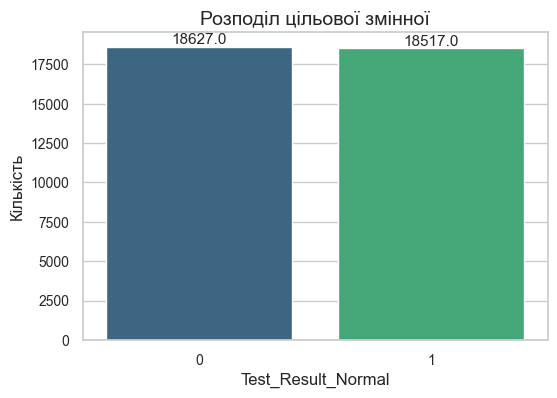

In [12]:
# -----------------------------
# 1. Розподіл цільової змінної
# -----------------------------
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Test_Result_Normal', palette="viridis")
plt.title('Розподіл цільової змінної')
plt.xlabel('Test_Result_Normal')
plt.ylabel('Кількість')

# Додаємо значення над стовпчиками
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')
plt.show()


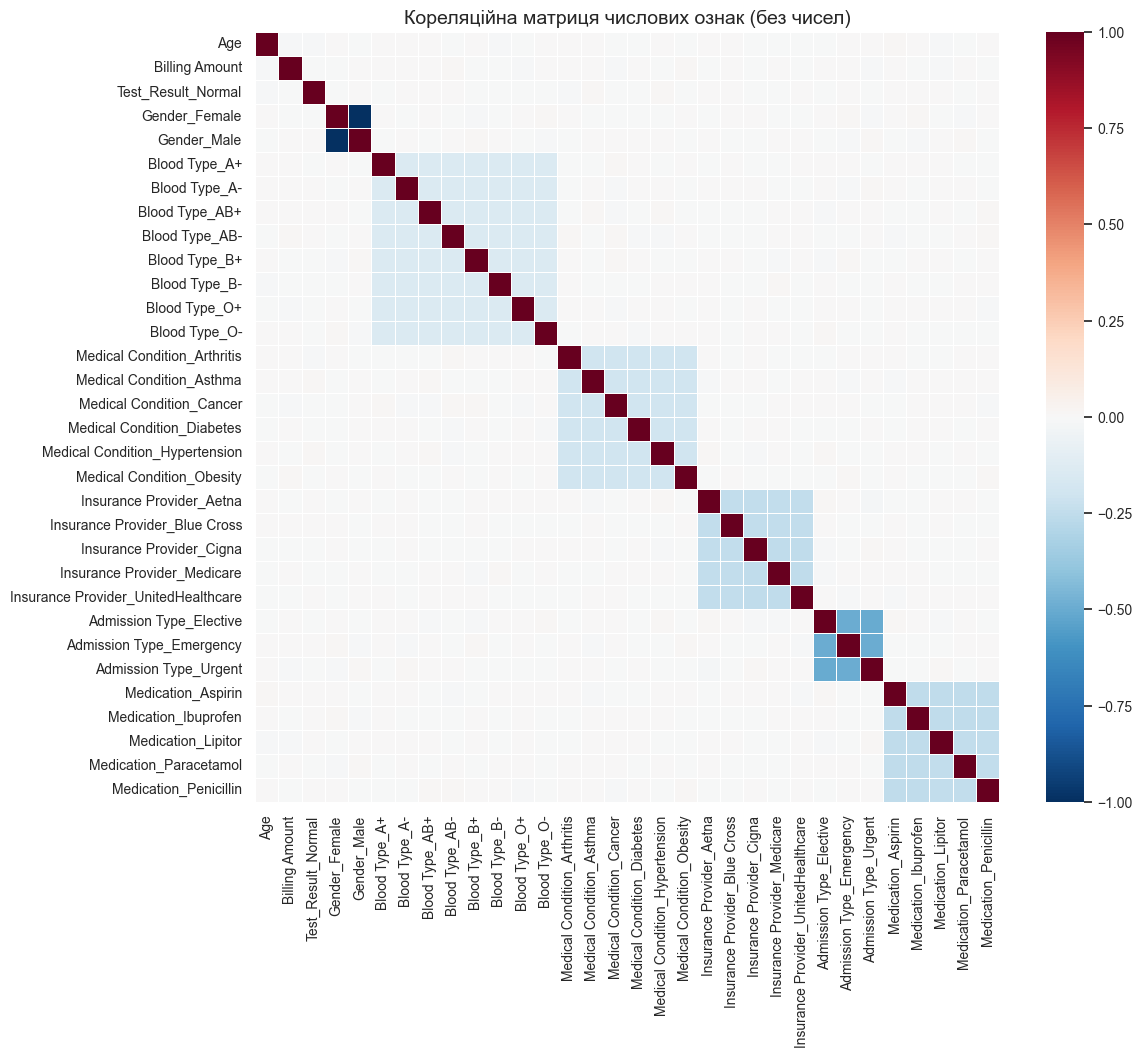

In [13]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='RdBu_r', center=0, linewidths=0.5)
plt.title('Кореляційна матриця числових ознак (без чисел)')
plt.show()


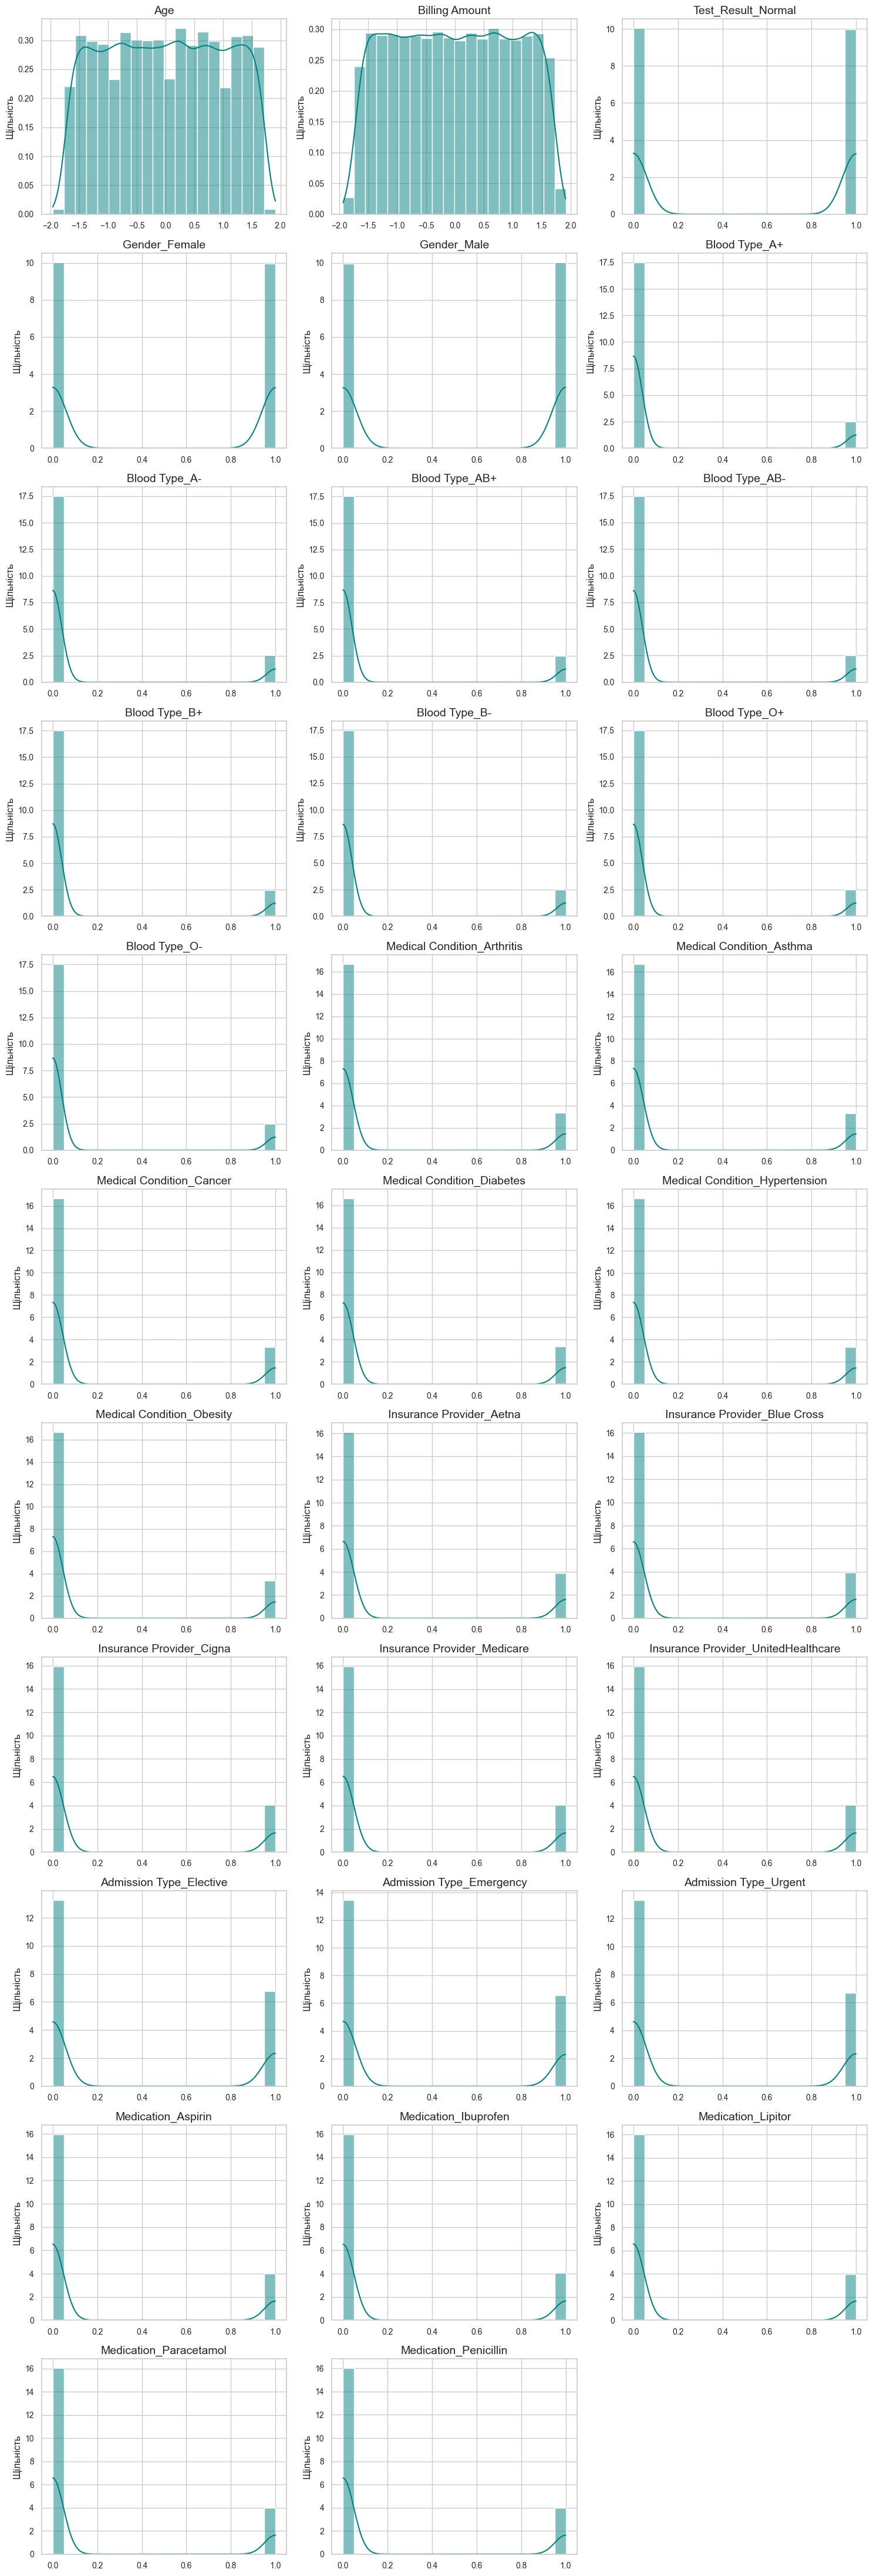

In [14]:
num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Кількість графіків у рядку
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=20, kde=True, color="teal", stat="density")  # stat="density" нормалізує
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Щільність')
    
plt.tight_layout()
plt.show()

11.	Розбиваємо дані на тренувальний (60%), валідаційний (20%) та тестовий (20%) набори.

In [15]:
X = df.drop(columns=['Test_Result_Normal']).values
y = df['Test_Result_Normal'].values

# Спочатку виділяємо 60% train і 40% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# З temp виділяємо валід. та тест (по 20% від оригіналу => половина від temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train.shape, X_val.shape, X_test.shape

((22286, 31), (7429, 31), (7429, 31))

12.	Готуємо матрицю X з intercept (стовпчик одиниць).

In [16]:
def add_intercept(X):
    return np.hstack([np.ones((X.shape[0],1)), X])

X_train_b = add_intercept(X_train)
X_val_b = add_intercept(X_val)
X_test_b = add_intercept(X_test)
n_features = X_train_b.shape[1]

13.	Програмуємо функції моделі (sigmoid, loss, gradient) — векторизовано. Використовуємо np.clip для числової стабільності для логарифма.

In [17]:
def sigmoid(z):
    # numerically stable sigmoid
    return 1.0 / (1.0 + np.exp(-z))

def predict_proba(X, w):
    return sigmoid(X.dot(w))

def compute_loss(X, y, w, lambda_=0.0):
    """Binary cross-entropy + (опціонально) L2 regularization (не для bias)"""
    n = X.shape[0]
    p = predict_proba(X, w)
    eps = 1e-15
    p = np.clip(p, eps, 1 - eps)
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    # L2 regularization (не беремо до уваги bias w[0])
    if lambda_ > 0:
        loss += (lambda_ / (2.0 * n)) * np.sum(w[1:] ** 2)
    return loss

def compute_gradient(X, y, w, lambda_, n_train):
    """Градієнт для батчу (векторизовано). Виключаємо bias з регуляризації."""
    m = X.shape[0]
    preds = predict_proba(X, w)
    grad = (X.T.dot(preds - y)) / m  # середній градієнт по батчу
    if lambda_ > 0:
        reg = np.concatenate(([0.0], (lambda_ / n_train) * w[1:]))  # scale by total train size
        grad += reg
    return grad

14.	Прописуємо функцію генерації батчів (shuffle).

In [18]:
def get_batches(X, y, batch_size=32, shuffle=True):
    n = X.shape[0]
    indices = np.arange(n)
    if shuffle:
        np.random.shuffle(indices)
    for start in range(0, n, batch_size):
        batch_idx = indices[start:start+batch_size]
        yield X[batch_idx], y[batch_idx]

15.	Проводимо навчання: загальна функція для SGD та mini-batch + рання зупинка.

In [19]:
def train_logistic(X_train, y_train, X_val, y_val,
                   method='mini-batch', batch_size=32,
                   learning_rate=0.01, lambda_=0.0,
                   max_epochs=200, patience=10, n_train=None,
                   verbose=True):
    """
    method: 'sgd' або 'mini-batch'
    n_train: total number of training examples (для регуляризації)
    """
    if n_train is None:
        n_train = X_train.shape[0]
    w = np.zeros(X_train.shape[1])  # ініціалізація нулями
    best_w = w.copy()
    best_val_loss = float('inf')
    epochs_no_improve = 0

    train_losses = []
    val_losses = []

    for epoch in range(max_epochs):
        if method == 'sgd':
            # оновлення по одному прикладу
            for xi, yi in get_batches(X_train, y_train, batch_size=1, shuffle=True):
                grad = compute_gradient(xi, yi, w, lambda_, n_train)
                w = w - learning_rate * grad
        else:
            # mini-batch
            for xb, yb in get_batches(X_train, y_train, batch_size=batch_size, shuffle=True):
                grad = compute_gradient(xb, yb, w, lambda_, n_train)
                w = w - learning_rate * grad

        # після епохи — розрахунок loss на train та val
        tr_loss = compute_loss(X_train, y_train, w, lambda_)
        val_loss = compute_loss(X_val, y_val, w, lambda_)
        train_losses.append(tr_loss)
        val_losses.append(val_loss)

        if verbose and (epoch % 10 == 0 or epoch == max_epochs-1):
            print(f"Epoch {epoch:3d} | train_loss: {tr_loss:.5f} | val_loss: {val_loss:.5f}")

        # рання зупинка по validation loss
        if val_loss < best_val_loss - 1e-8:
            best_val_loss = val_loss
            best_w = w.copy()
            epochs_no_improve = 0
            best_epoch = epoch
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            if verbose:
                print(f"Early stopping at epoch {epoch}, best epoch {best_epoch}, best val_loss {best_val_loss:.5f}")
            break

    # повертаємо найкращі ваги та історію
    return best_w, train_losses, val_losses

16.	Вказуємо параметри та тренуємо обидва алгоритми.

In [20]:
# Параметри
lr = 0.01
epochs = 300
patience = 15
batch_size = 32
lambda_reg = 0.01

# Тренуємо SGD
start = time.time()
w_sgd, tr_losses_sgd, val_losses_sgd = train_logistic(X_train_b, y_train, X_val_b, y_val,
                                                      method='sgd',
                                                      batch_size=1,
                                                      learning_rate=lr,
                                                      lambda_=lambda_reg,
                                                      max_epochs=epochs,
                                                      patience=patience,
                                                      n_train=X_train_b.shape[0],
                                                      verbose=True)
print('SGD time:', time.time()-start)

# Тренуємо mini-batch
start = time.time()
w_mb, tr_losses_mb, val_losses_mb = train_logistic(X_train_b, y_train, X_val_b, y_val,
                                                   method='mini-batch',
                                                   batch_size=batch_size,
                                                   learning_rate=lr,
                                                   lambda_=lambda_reg,
                                                   max_epochs=epochs,
                                                   patience=patience,
                                                   n_train=X_train_b.shape[0],
                                                   verbose=True)
print('Mini-batch time:', time.time()-start)

Epoch   0 | train_loss: 0.69821 | val_loss: 0.69968
Epoch  10 | train_loss: 0.69940 | val_loss: 0.70003
Early stopping at epoch 18, best epoch 3, best val_loss 0.69579
SGD time: 4.56604790687561
Epoch   0 | train_loss: 0.69294 | val_loss: 0.69312
Epoch  10 | train_loss: 0.69279 | val_loss: 0.69334
Early stopping at epoch 15, best epoch 0, best val_loss 0.69312
Mini-batch time: 0.16700148582458496


17.	Будуємо криві навчання.

SGD (сині та помаранчеві лінії)

Loss коливається через те, що оновлення ваг відбуваються після кожного прикладу.

Тренувальний та валідаційний loss рухаються синхронно → перенавчання поки немає

Mini-batch (зелені та червоні лінії)

Loss більш стабільний, без великих стрибків.

Ефект усереднення градієнтів на батчах зменшує шум і робить процес більш передбачуваним.

Сгладжені лінії (smooth_curve)

Додають наочності і дозволяють бачити загальну тенденцію тренування, прибираючи дрібні коливання.


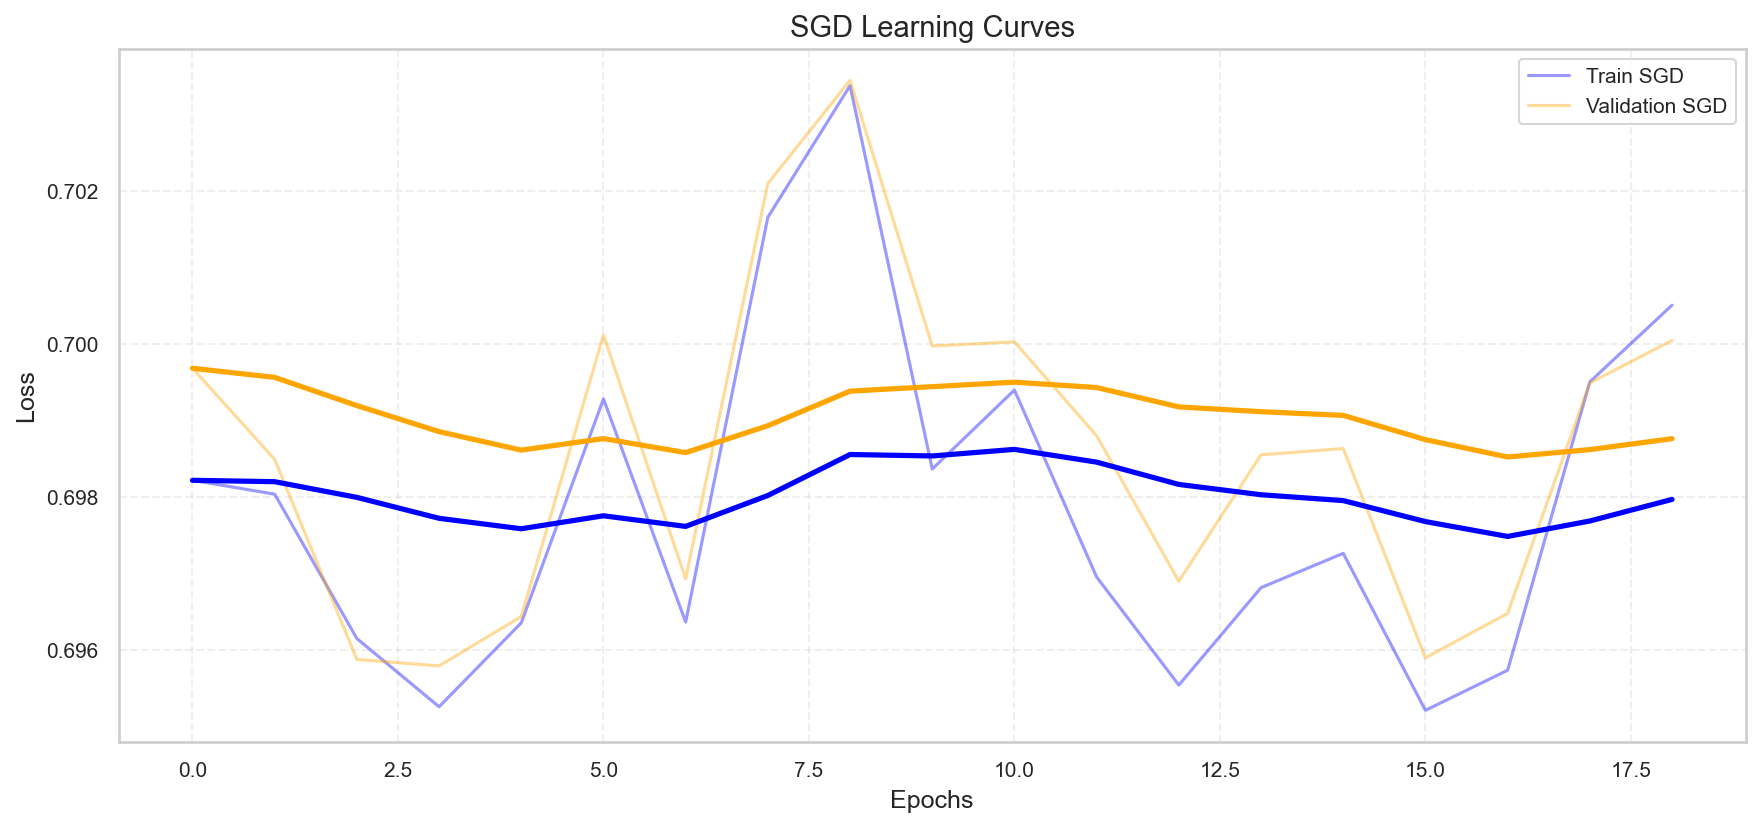

In [26]:
def smooth_curve(losses, alpha=0.1):
    smoothed = []
    for i in range(len(losses)):
        if i == 0:
            smoothed.append(losses[i])
        else:
            smoothed.append(alpha*losses[i] + (1-alpha)*smoothed[-1])
    return smoothed

plt.figure(figsize=(14,6), dpi=150)

# Оригінальні криві
plt.plot(tr_losses_sgd, color='blue', label='Train SGD', alpha=0.4)
plt.plot(val_losses_sgd, color='orange', label='Validation SGD', alpha=0.4)

# Сгладжена крива
plt.plot(smooth_curve(tr_losses_sgd), color='blue', linewidth=2.5)
plt.plot(smooth_curve(val_losses_sgd), color='orange', linewidth=2.5)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('SGD Learning Curves', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3, linestyle='--')


plt.show()

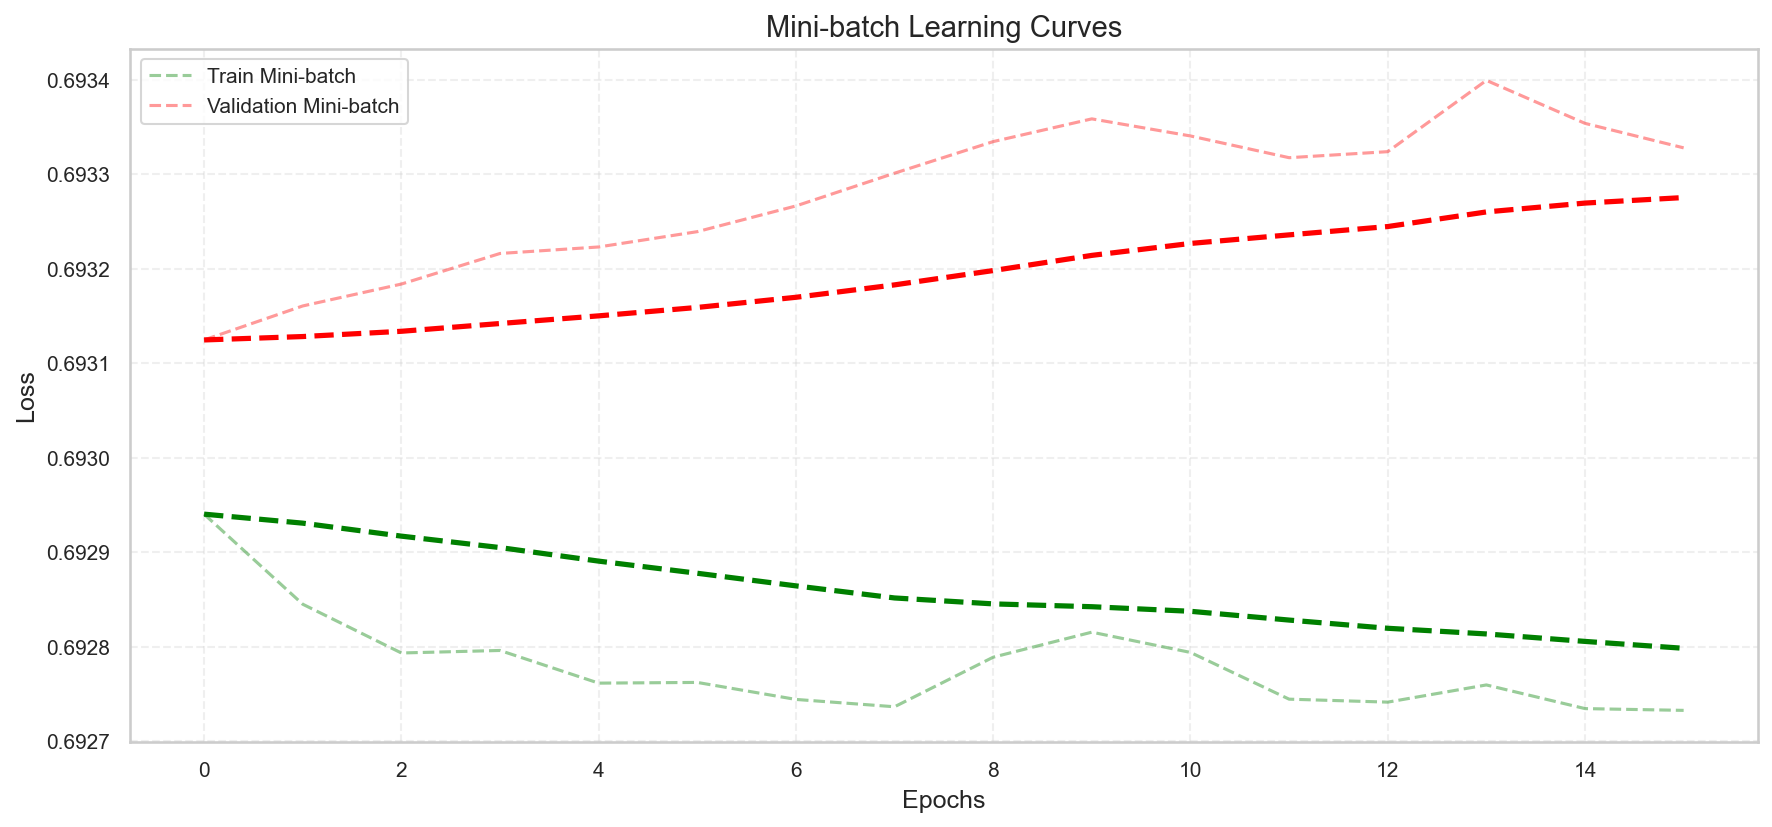

In [27]:
plt.figure(figsize=(14,6), dpi=150)

# Оригінальні криві
plt.plot(tr_losses_mb, '--', color='green', label='Train Mini-batch', alpha=0.4)
plt.plot(val_losses_mb, '--', color='red', label='Validation Mini-batch', alpha=0.4)

# Сгладжена крива
plt.plot(smooth_curve(tr_losses_mb), '--', color='green', linewidth=2.5)
plt.plot(smooth_curve(val_losses_mb), '--', color='red', linewidth=2.5)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Mini-batch Learning Curves', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3, linestyle='--')


plt.show()

"""
**Пояснення:**

- **Mini-batch:** стабільний loss завдяки усередненню градієнтів.  
- **SGD:** шумний loss (кожен приклад окремо), великі коливання.
"""

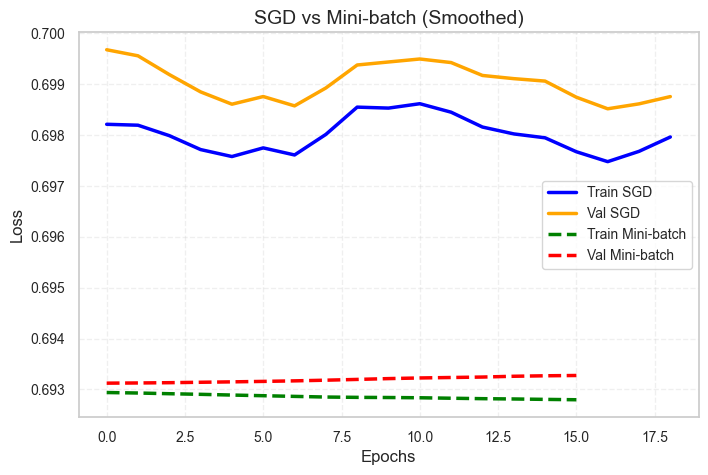

In [29]:
plt.figure(figsize=(8,5))

plt.plot(smooth_curve(tr_losses_sgd), color='blue', linewidth=2.5, label='Train SGD')
plt.plot(smooth_curve(val_losses_sgd), color='orange', linewidth=2.5, label='Val SGD')
plt.plot(smooth_curve(tr_losses_mb), '--', color='green', linewidth=2.5, label='Train Mini-batch')
plt.plot(smooth_curve(val_losses_mb), '--', color='red', linewidth=2.5, label='Val Mini-batch')

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('SGD vs Mini-batch (Smoothed)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3, linestyle='--')

plt.show()

18.	Проводимо оцінку на тесті: передбачення, confusion matrix, метрики.

In [30]:
def predict_labels(X, w, threshold=0.5):
    return (predict_proba(X, w) >= threshold).astype(int)

def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true==1) & (y_pred==1))
    TN = np.sum((y_true==0) & (y_pred==0))
    FP = np.sum((y_true==0) & (y_pred==1))
    FN = np.sum((y_true==1) & (y_pred==0))
    return np.array([[TN, FP],[FN, TP]])

def metrics_from_confmat(cm):
    TN, FP, = cm[0,0], cm[0,1]
    FN, TP, = cm[1,0], cm[1,1]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    if precision + recall == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    return {'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f1}

# оцінка
y_pred_sgd = predict_labels(X_test_b, w_sgd)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
metrics_sgd = metrics_from_confmat(cm_sgd)

y_pred_mb = predict_labels(X_test_b, w_mb)
cm_mb = confusion_matrix(y_test, y_pred_mb)
metrics_mb = metrics_from_confmat(cm_mb)

cm_sgd, metrics_sgd, cm_mb, metrics_mb

(array([[2299, 1427],
        [2240, 1463]]),
 {'accuracy': np.float64(0.5063938618925832),
  'precision': np.float64(0.5062283737024221),
  'recall': np.float64(0.3950850661625709),
  'f1': np.float64(0.4438040345821326)},
 array([[2131, 1595],
        [2109, 1594]]),
 {'accuracy': np.float64(0.5014133799973078),
  'precision': np.float64(0.49984321103794294),
  'recall': np.float64(0.43046178773967053),
  'f1': np.float64(0.4625652930934417)})

19.	Порівняльна таблиця результатів:

In [35]:
# Таблиця результатів
results_df = pd.DataFrame({
    'Метод': ['SGD', 'Mini-batch'],
    'Accuracy': [metrics_sgd['accuracy'], metrics_mb['accuracy']],
    'Precision': [metrics_sgd['precision'], metrics_mb['precision']],
    'Recall': [metrics_sgd['recall'], metrics_mb['recall']],
    'F1-score': [metrics_sgd['f1'], metrics_mb['f1']]
})

# Відображаємо таблицю з усіма стовпцями та форматуванням
display(
    results_df.style
    .set_caption("Підсумкові метрики для різних методів оптимізації")
    .format("{:.3f}", subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])
)

,Метод,Accuracy,Precision,Recall,F1-score
0,SGD,0.506,0.506,0.395,0.444
1,Mini-batch,0.501,0.500,0.430,0.463


**Висновок:**  

У ході роботи було реалізовано два методи оптимізації логістичної регресії — стохастичний градієнтний спуск (SGD) та mini-batch.  

- **SGD** забезпечує поступове зниження функції втрат, однак крива навчання має значні коливання через оновлення вагів після кожного прикладу. Незважаючи на цей шум, тренувальна та валідаційна помилки змінювалися синхронно, що свідчить про відсутність суттєвого перенавчання.  
- **Mini-batch** метод продемонстрував більш плавну та стабільну динаміку зниження loss завдяки усередненню градієнтів у батчах, що зменшило випадкові стрибки.  

За підсумковими метриками на тестовій вибірці обидва методи показали близькі результати, проте mini-batch виявився більш ефективним з точки зору стабільності навчання та узгодженості кривих. Це дозволяє вважати його практично зручнішим для використання у задачах подібного типу.

### Автор роботи:
**Малий Ренат**  
**Група:** ФЕІ-43(2)
---